# For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

 

## ======================================================================== 

# Importing necessary libraries

In [1]:
!pip3 install spacy

In [2]:
!pip install wordcloud

In [3]:
!pip install -U spacy

In [4]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-23 22:43:51.023493: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-23 22:43:51.024108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-23 22:44:02.930180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-23 22:44:02.931127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-08-23 22:44:02.931623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-08-23 22:44:02.932097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import string 
import spacy
from wordcloud import WordCloud
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.porter import PorterStemmer
%matplotlib inline

# 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

# Importing data

In [6]:
elon_data=pd.read_csv("Elon_musk.csv",sep="\t",encoding="latin-1")
elon_data=elon_data.rename({",Text":"Text"},axis=1)
elon_data

,Text
0,"1,@kunalb11 Im an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
2076,"1995,""@flcnhvy True, it sounds so surreal, but..."
2077,"1996,@PPathole Make sure to read ur terms &amp..."
2078,"1997,@TeslaGong @PPathole Samwise Gamgee"
2079,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


# EDA

In [7]:
elon_data.shape

(2081, 1)

In [8]:
elon_data.describe()

,Text
count,2081
unique,2081
top,"1,@kunalb11 Im an alien"
freq,1


In [9]:
elon_data.isna().sum()

Text    0
dtype: int64

In [10]:
elon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2081 non-null   object
dtypes: object(1)
memory usage: 16.4+ KB


# Data cleaning

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stopwords=pd.read_csv("stop.txt",names=["english"])

cleaned_data=[]

ps=PorterStemmer()

lemmatizer=WordNetLemmatizer()
for i in range(0,len(elon_data)):
    tweet=re.sub("[^a-zA-Z]", " ",elon_data["Text"][i])
    tweet=tweet.lower()
    tweet=tweet.split()
    
    tweet=[ps.stem(word) for word in tweet if word not in stopwords]
    
    tweet=[lemmatizer.lemmatize(word) for word in tweet if word not in stopwords]
    tweet=" ".join(tweet)
    cleaned_data.append(tweet)
cleaned_data

['kunalb i m an alien',
 'id aa carmack ray trace on cyberpunk with hdr is next level have you tri it',
 'joerogan spotifi great interview',
 'gtera doge is underestim',
 'teslacn congratul tesla china for amaz execut last year now on to the next for even more',
 'happi new year of the ox http t co wfkmyu oj',
 'frodo wa the underdog',
 'all thought he would fail',
 'himself most of all http t co zgxjfdzzrm',
 'owenspark flcnhvi anonyx haha thank',
 'flcnhvi anonyx inde tweet definit do not repres real world time alloc',
 'the most entertain outcom is the most like',
 'givedirectli just sent some',
 'just agre to do clubhous with kanyewest',
 'http t co rwe uhst',
 'geoffkeighley unrealengin it s get real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmod he definit ha issu but the sentenc seem a bit high',
 'freewalletorg thank for fix',
 'freewalletorg plea unlock my account',
 'astrojordi u f u f',
 'thi is true power haha http t co fc uhqsd o',
 'freewa

In [13]:
sent_df = pd.DataFrame(cleaned_data,columns=["sentence"])
sent_df

,sentence
0,kunalb i m an alien
1,id aa carmack ray trace on cyberpunk with hdr ...
2,joerogan spotifi great interview
3,gtera doge is underestim
4,teslacn congratul tesla china for amaz execut ...
...,...
2076,flcnhvi true it sound so surreal but the neg p...
2077,ppathol make sure to read ur term amp condit b...
2078,teslagong ppathol samwis gamge
2079,ppathol altho dumb and dumber is u f u f


## Vector Representation

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer()
X=count_vect.fit_transform(cleaned_data).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
BOW=count_vect.transform(cleaned_data)
print(BOW)

  (0, 119)	1
  (0, 154)	1
  (0, 2206)	1
  (1, 0)	1
  (1, 586)	1
  (1, 890)	1
  (1, 1734)	1
  (1, 1745)	1
  (1, 1888)	1
  (1, 2013)	1
  (1, 2019)	1
  (1, 2279)	1
  (1, 2695)	1
  (1, 2826)	1
  (1, 3279)	1
  (1, 4205)	1
  (1, 4221)	1
  (1, 4606)	1
  (1, 4748)	1
  (2, 1663)	1
  (2, 1991)	1
  (2, 2091)	1
  (2, 3797)	1
  (3, 1055)	1
  (3, 1681)	1
  :	:
  (2077, 21)	1
  (2077, 150)	1
  (2077, 370)	1
  (2077, 705)	1
  (2077, 773)	1
  (2077, 2412)	1
  (2077, 3096)	1
  (2077, 3294)	1
  (2077, 3935)	1
  (2077, 4025)	1
  (2077, 4161)	1
  (2077, 4362)	1
  (2078, 1554)	1
  (2078, 3096)	1
  (2078, 3505)	1
  (2078, 4038)	1
  (2079, 134)	1
  (2079, 161)	1
  (2079, 1108)	1
  (2079, 1109)	1
  (2079, 2013)	1
  (2079, 3096)	1
  (2080, 274)	1
  (2080, 3154)	1
  (2080, 4353)	1


## Afinn Dictionary importing

In [16]:
afinn=pd.read_csv("Afinn.csv",encoding="latin-1")
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [17]:
afinn.shape

(2477, 2)

In [18]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as a list"
    return list (islice(iterable,n))

In [19]:
afin_score=afinn.set_index("word")["value"].to_dict()
take(30,afin_score.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1),
 ('abuse', -3),
 ('abused', -3),
 ('abuses', -3),
 ('abusive', -3),
 ('accept', 1),
 ('accepted', 1),
 ('accepting', 1),
 ('accepts', 1),
 ('accident', -2),
 ('accidental', -2)]

In [20]:
nlp=spacy.load("en_core_web_sm")
sentiment_lexicon=afin_score

In [21]:
def calculate_sentiment(text: str=None) ->float:
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score +=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [22]:
calculate_sentiment("abuse")

-3

In [23]:
calculate_sentiment("congratulations")

2

In [24]:
sent_df["Sentiment_score"]=sent_df["sentence"].apply(calculate_sentiment)
sent_df

,sentence,Sentiment_score
0,kunalb i m an alien,0
1,id aa carmack ray trace on cyberpunk with hdr ...,0
2,joerogan spotifi great interview,3
3,gtera doge is underestim,0
4,teslacn congratul tesla china for amaz execut ...,0
...,...,...
2076,flcnhvi true it sound so surreal but the neg p...,-2
2077,ppathol make sure to read ur term amp condit b...,1
2078,teslagong ppathol samwis gamge,0
2079,ppathol altho dumb and dumber is u f u f,-3


In [25]:
sent_df["Word_count"]=sent_df["sentence"].str.split().apply(len)
sent_df

,sentence,Sentiment_score,Word_count
0,kunalb i m an alien,0,5
1,id aa carmack ray trace on cyberpunk with hdr ...,0,16
2,joerogan spotifi great interview,3,4
3,gtera doge is underestim,0,4
4,teslacn congratul tesla china for amaz execut ...,0,17
...,...,...,...
2076,flcnhvi true it sound so surreal but the neg p...,-2,27
2077,ppathol make sure to read ur term amp condit b...,1,12
2078,teslagong ppathol samwis gamge,0,4
2079,ppathol altho dumb and dumber is u f u f,-3,10


# Sorting

In [26]:
sentiment_value_wise_sorting = sent_df.sort_values(by="Sentiment_score")
sentiment_value_wise_sorting

,sentence,Sentiment_score,Word_count
1790,neuro skeptic they don t fire all at onc some ...,-8,27
1067,enn nafnlau there are sketchi edit to tesla wi...,-7,23
206,naval some tyranni also the road to hell is mo...,-7,14
1425,alert alarm just go through reson mode fast it...,-5,18
940,pcgamer fear is best imo also dead space they ...,-5,13
...,...,...,...
498,picot john cyberpunkgam it s a good to great g...,8,27
1417,great trip to germani support from govern amp ...,8,12
1226,thank tesla team for great work on deliveri fo...,8,23
1864,flcnhvi yourfavga ajtourvil i realli want to d...,8,19


In [27]:
sent_df["Sentiment_score"].describe()

count    2081.000000
mean        0.535800
std         1.636069
min        -8.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Sentiment_score, dtype: float64

In [28]:
sent_df[sent_df.Sentiment_score<0]

,sentence,Sentiment_score,Word_count
7,all thought he would fail,-2,5
23,freewalletorg your app suck,-3,4
27,rationaletienn adamklotz starlink is a stagger...,-1,21
37,that s what you re miss,-2,6
50,univercuri extrem mislead imag a doesn t refle...,-2,17
...,...,...,...
2058,thatt slaguy flcnhvi ppathol ihearttesla earn ...,-1,20
2072,kenyanwalstreet not actual a payout just a ves...,-1,27
2073,ihearttesla no easi way to answer thi in a twe...,-2,22
2076,flcnhvi true it sound so surreal but the neg p...,-2,27


In [29]:
sent_df[sent_df.Sentiment_score>0]

,sentence,Sentiment_score,Word_count
2,joerogan spotifi great interview,3,4
9,owenspark flcnhvi anonyx haha thank,5,5
11,the most entertain outcom is the most like,2,8
17,joshmanmod he definit ha issu but the sentenc ...,2,12
18,freewalletorg thank for fix,2,4
...,...,...,...
2068,best use of the term full stack,3,7
2069,ppathol ihearttesla for sure thi is both great...,5,25
2071,buzzindelhi sorri should hope be soon,2,6
2077,ppathol make sure to read ur term amp condit b...,1,12


In [30]:
sent_df[sent_df.Sentiment_score==0]

,sentence,Sentiment_score,Word_count
0,kunalb i m an alien,0,5
1,id aa carmack ray trace on cyberpunk with hdr ...,0,16
3,gtera doge is underestim,0,4
4,teslacn congratul tesla china for amaz execut ...,0,17
5,happi new year of the ox http t co wfkmyu oj,0,11
...,...,...,...
2066,burakaydik true,0,2
2070,redmerci ye,0,2
2074,ai symbiosi while u wait,0,5
2075,vistacruis flcnhvi there s some of that too,0,8


# Visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_score', ylabel='Density'>

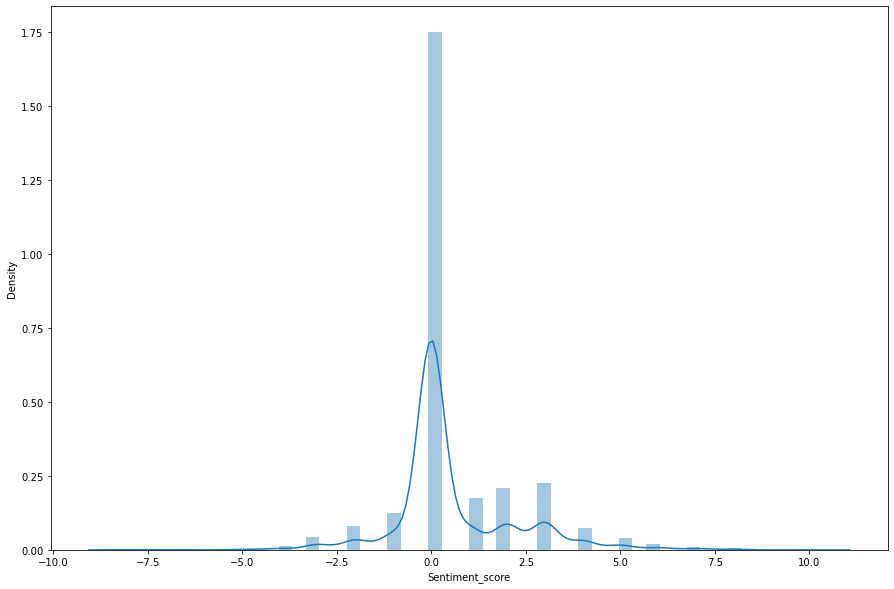

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df.Sentiment_score)

In the given tweets set, the maximum range of sentimental scores is between -5 to 5.

Text(0, 0.5, 'Sentimenta Scores')

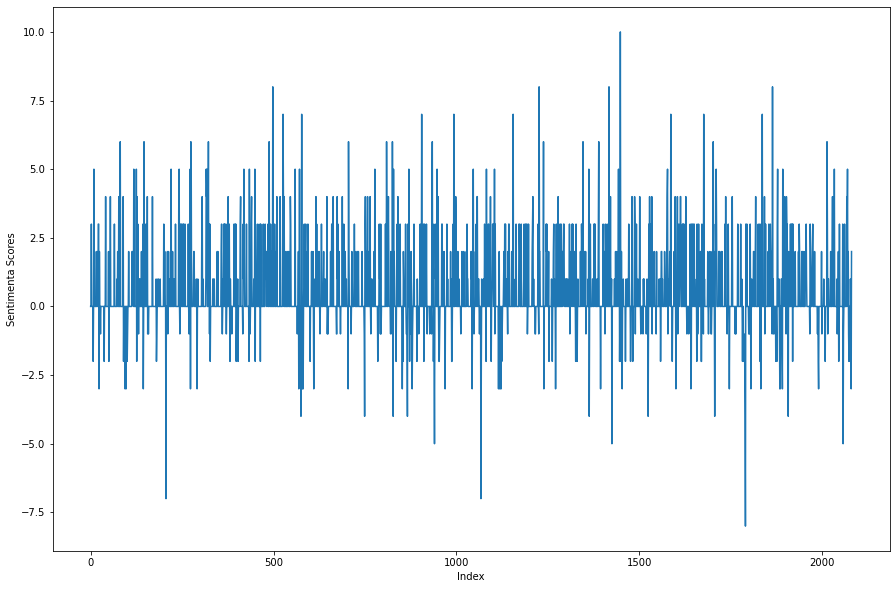

In [32]:
plt.figure(figsize=(15,10))
plt.plot(sent_df.Sentiment_score)
plt.xlabel("Index")
plt.ylabel("Sentimenta Scores")

<AxesSubplot:xlabel='Sentiment_score', ylabel='Word_count'>

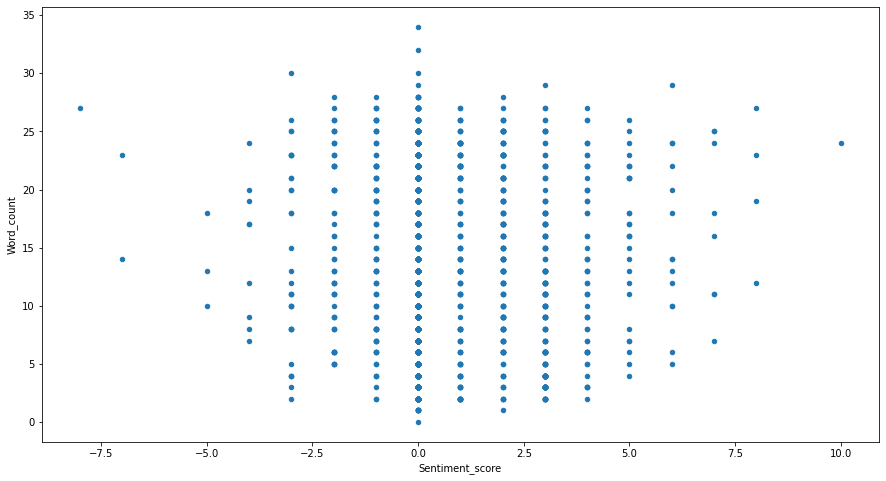

In [33]:
sent_df.plot.scatter(x="Sentiment_score",y="Word_count",figsize=(15,8))

# 2) Perform emotion mining

In [34]:
tweets = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [35]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [36]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [37]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [38]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [39]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [40]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [43]:
# Tokenization
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# Tokens count
len(text_tokens)

17847

In [45]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [46]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [47]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [48]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [49]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'star

In [50]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

# Feature Extaction

## 1. Using CountVectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [52]:
print(cv.vocabulary_)

{'alien': 195, 'ray': 2359, 'trace': 3023, 'cyberpunk': 769, 'hdr': 1364, 'nextlevel': 1969, 'have': 1359, 'try': 3055, 'great': 1312, 'interview': 1561, 'doge': 894, 'underestimate': 3188, 'congratulation': 677, 'tesla': 2931, 'china': 587, 'amazing': 219, 'execution': 1063, 'last': 1645, 'year': 3405, 'now': 1997, 'next': 1968, 'even': 1037, 'happy': 1346, 'new': 1966, 'ox': 2098, 'frodo': 1213, 'underdoge': 3187, 'all': 198, 'think': 2959, 'would': 3391, 'fail': 1098, 'himself': 1406, 'haha': 1335, 'thank': 2941, 'indeed': 1502, 'tweet': 3070, 'definitely': 807, 'represent': 2426, 'realworld': 2374, 'time': 2982, 'allocation': 200, 'the': 2945, 'entertaining': 1007, 'outcome': 2076, 'likely': 1699, 'just': 1603, 'send': 2569, 'agree': 179, 'clubhouse': 616, 'it': 1580, 'get': 1272, 'real': 2369, 'buy': 505, 'dogecoin': 896, 'lil': 1700, 'toddler': 2993, 'hodler': 1412, 'he': 1365, 'issue': 1579, 'sentencing': 2574, 'seem': 2561, 'bit': 420, 'high': 1398, 'fix': 1158, 'please': 2193,

In [53]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'aiming', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', '

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(tweetscv.toarray().shape)

(11486, 3425)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [56]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [57]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [59]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock',

# Generate Word Cloud

In [60]:
from wordcloud import WordCloud, STOPWORDS

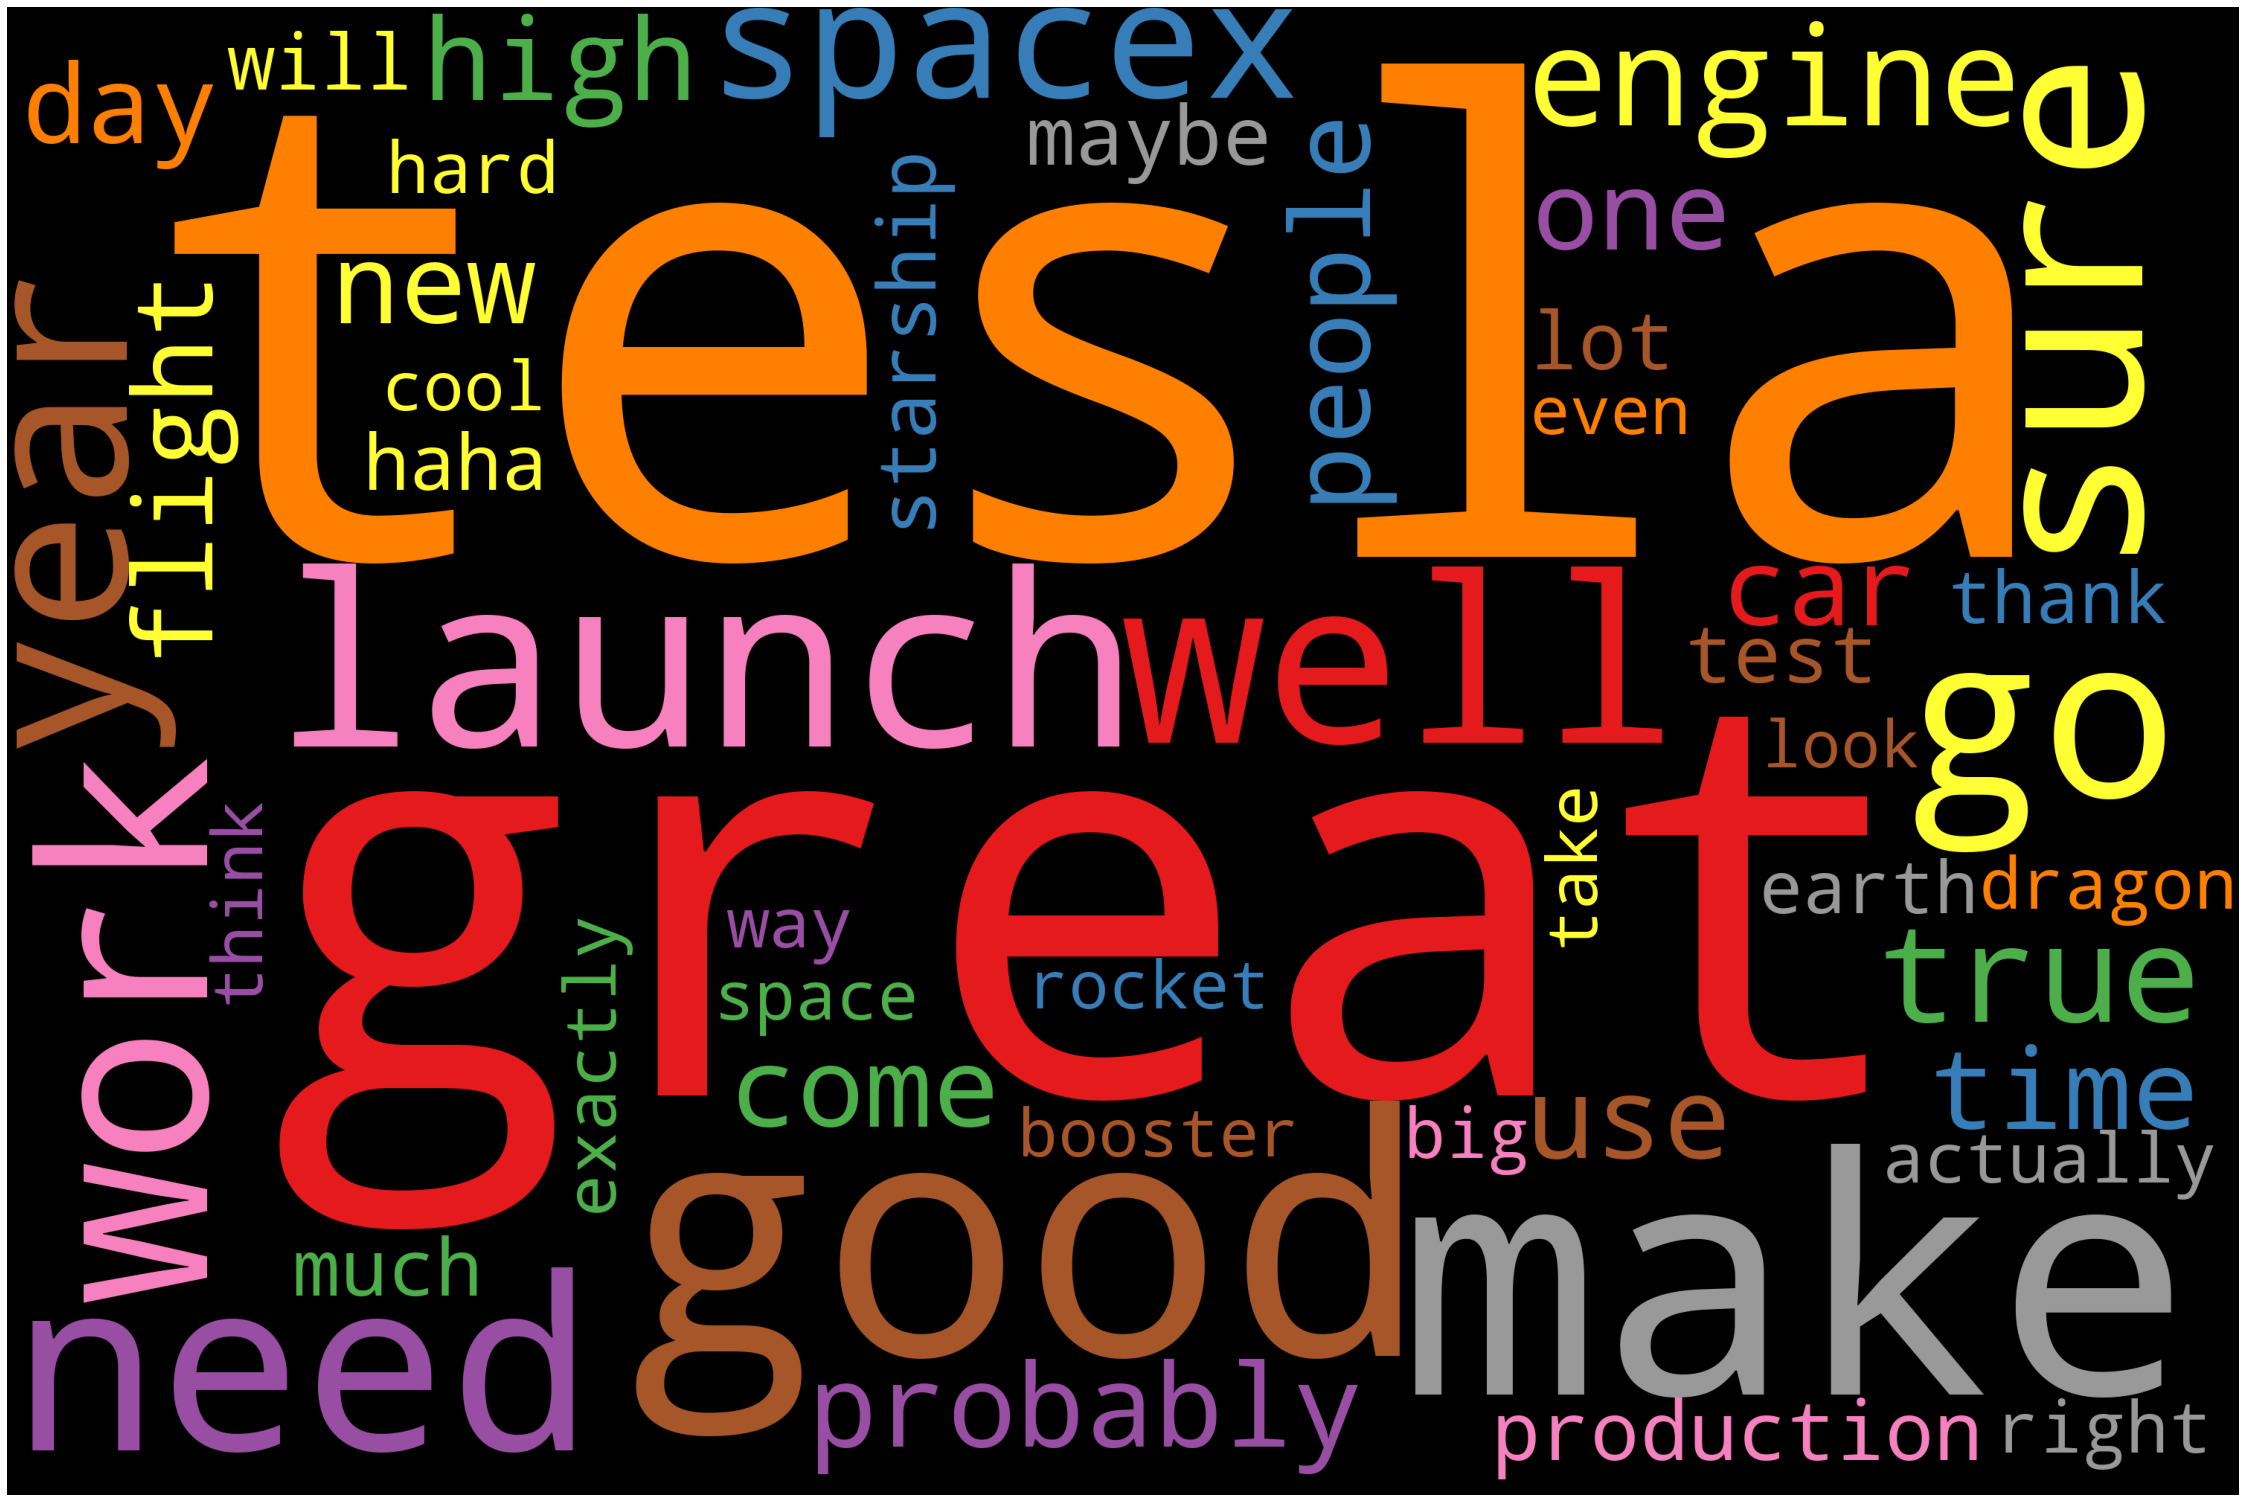

In [61]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [62]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [63]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex ADJ
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis ADJ
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit ADV
high ADJ
doge X
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow NUM
1 NUM
orbital A

In [64]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try', 'pull']


In [65]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,go,47
5,need,42
6,come,39
7,get,38
8,day,38
9,time,37


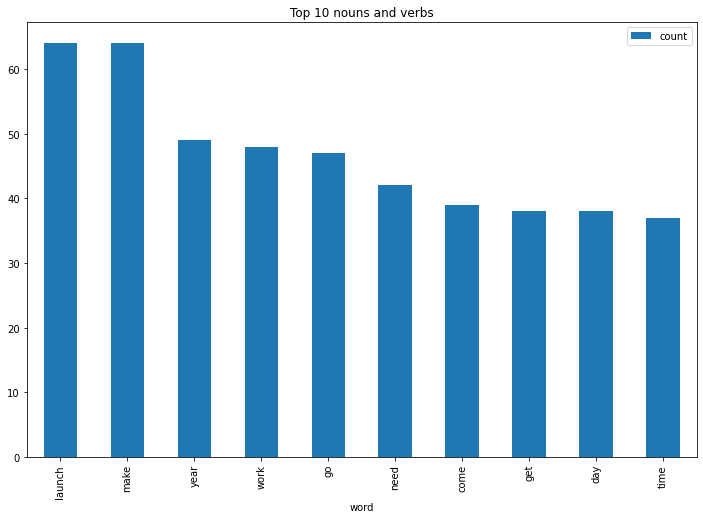

In [66]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Positive negetive 

In [67]:
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
elon_sent = sent_df.copy()
elon_sent

,sentence,Sentiment_score,Word_count
0,kunalb i m an alien,0,5
1,id aa carmack ray trace on cyberpunk with hdr ...,0,16
2,joerogan spotifi great interview,3,4
3,gtera doge is underestim,0,4
4,teslacn congratul tesla china for amaz execut ...,0,17
...,...,...,...
2076,flcnhvi true it sound so surreal but the neg p...,-2,27
2077,ppathol make sure to read ur term amp condit b...,1,12
2078,teslagong ppathol samwis gamge,0,4
2079,ppathol altho dumb and dumber is u f u f,-3,10


In [71]:
elon_sent.drop(axis = 1, columns = ['Sentiment_score','Word_count'])

,sentence
0,kunalb i m an alien
1,id aa carmack ray trace on cyberpunk with hdr ...
2,joerogan spotifi great interview
3,gtera doge is underestim
4,teslacn congratul tesla china for amaz execut ...
...,...
2076,flcnhvi true it sound so surreal but the neg p...
2077,ppathol make sure to read ur term amp condit b...
2078,teslagong ppathol samwis gamge
2079,ppathol altho dumb and dumber is u f u f


In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
!pip install textblob

In [75]:
from textblob import Word
elon_sent["sentence"]= elon_sent["sentence"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [77]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
elon_sent["sentence"]= elon_sent["sentence"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [78]:
Tweets_set=elon_sent["sentence"]

In [79]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [80]:
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(elon_sent["sentence"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aa  aayypcpp  ab  aber  abl  abo  aboard  abort  about  abov  ...  \
0      0         0   0     0    0    0       0      0      0     0  ...   
1      1         0   0     0    0    0       0      0      0     0  ...   
2      0         0   0     0    0    0       0      0      0     0  ...   
3      0         0   0     0    0    0       0      0      0     0  ...   
4      0         0   0     0    0    0       0      0      0     0  ...   
...   ..       ...  ..   ...  ...  ...     ...    ...    ...   ...  ...   
2076   0         0   0     0    0    0       0      0      0     0  ...   
2077   0         0   0     0    0    0       0      0      0     0  ...   
2078   0         0   0     0    0    0       0      0      0     0  ...   
2079   0         0   0     0    0    0       0      0      0     0  ...   
2080   0         0   0     0    0    0       0      0      0     0  ...   

      zubinanari  zugaquvpi  zvm  zwiebelbach  zxd  zyf  zyj  zynsxisp  zz  \
0              0     

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF_1=tfidf.fit_transform(elon_sent["sentence"])
print(TFIDF_1)

  (0, 119)	0.6015070396295921
  (0, 154)	0.4194520425882333
  (0, 2206)	0.6798891565870153
  (1, 2019)	0.15202758159258445
  (1, 4220)	0.2552057594153737
  (1, 4747)	0.18429435862211924
  (1, 1734)	0.1942642923385655
  (1, 2279)	0.282231788340287
  (1, 2695)	0.23687616167230308
  (1, 2013)	0.12930556539290727
  (1, 1745)	0.35929722790373697
  (1, 4605)	0.17896981744368734
  (1, 890)	0.30963297585295685
  (1, 2826)	0.17236143966948494
  (1, 4204)	0.35929722790373697
  (1, 3278)	0.32796257359602754
  (1, 586)	0.23395861067289928
  (1, 0)	0.23395861067289928
  (1, 1888)	0.23395861067289928
  (2, 1991)	0.5045177327696706
  (2, 1663)	0.30832798852681126
  (2, 3796)	0.5702612159405379
  (2, 2091)	0.5702612159405379
  (3, 4315)	0.5990229418270994
  (3, 1055)	0.4856631027676821
  :	:
  (2077, 705)	0.39168916072391474
  (2077, 773)	0.37170708405085495
  (2077, 21)	0.34653264468101247
  (2077, 370)	0.32336998932942235
  (2077, 3095)	0.18829628160102713
  (2077, 4024)	0.2994432587518267
  (2077, 

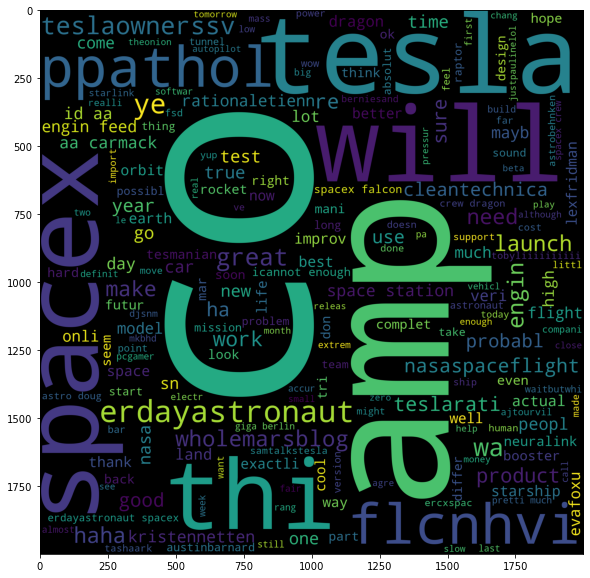

In [83]:
Review_wordcloud = ' '.join(elon_sent["sentence"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [84]:
freq = pd.Series(' '.join(elon_sent["sentence"]).split()).value_counts()[0:20]
freq

co                660
http              656
the               487
to                400
is                356
of                316
spacex            250
in                221
amp               219
it                209
for               194
tesla             181
we                173
be                166
will              165
that              149
erdayastronaut    142
thi               140
on                130
rt                127
dtype: int64

In [86]:
from textblob import TextBlob
elon_sent['polarity'] = elon_sent["sentence"].apply(lambda x: TextBlob(x).sentiment[0])
elon_sent[['sentence','polarity']].head(5)

,sentence,polarity
0,kunalb an alien,-0.250000
1,id aa carmack ray trace on cyberpunk with hdr ...,0.000000
2,joerogan spotifi great interview,0.800000
3,gtera doge is underestim,0.000000
4,teslacn congratul tesla china for amaz execut ...,0.166667


In [88]:
elon_sent[elon_sent.polarity>0].head(5)

,sentence,Sentiment_score,Word_count,polarity
2,joerogan spotifi great interview,3,4,0.800000
4,teslacn congratul tesla china for amaz execut ...,0,17,0.166667
5,happi new year of the ox http co wfkmyu oj,0,11,0.136364
8,himself most of all http co zgxjfdzzrm,0,8,0.500000
9,owenspark flcnhvi anonyx haha thank,5,5,0.200000


In [89]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [91]:
sent_type(elon_sent['polarity'])

negative
neutral
positive
neutral
positive
positive
neutral
negative
positive
positive
positive
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
neutral
neutral
negative
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
negative
neutral
negative
neutral
neutral
negative
neutral
neutral
negative
positive
neutral
neutral
positive
neutral
neutral
positive
negative
neutral
neutral
neutral
neutral
neutral
positive
negative
positive
neutral
positive
neutr

In [93]:
elon_sent["category"]=elon_sent['polarity']

elon_sent.loc[elon_sent.category > 0,'category']="Positive"
elon_sent.loc[elon_sent.category !='Positive','category']="Negative"

elon_sent["category"]=elon_sent["category"].astype('category')
elon_sent.dtypes

sentence             object
Sentiment_score       int64
Word_count            int64
polarity            float64
category           category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

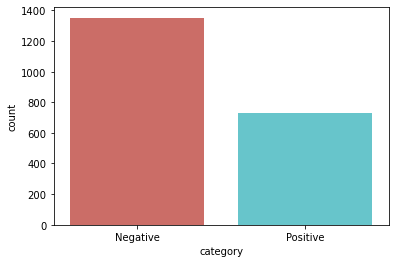

In [94]:
sns.countplot(x='category',data=elon_sent,palette='hls')

In [95]:
elon_sent.category.value_counts(normalize=True).mul(100)

Negative    64.920711
Positive    35.079289
Name: category, dtype: float64

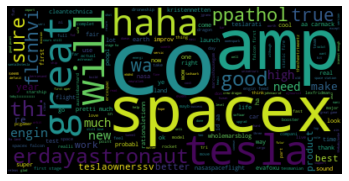

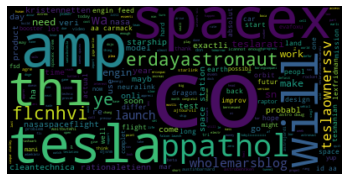

In [98]:
positive_reviews= elon_sent[elon_sent.category=='Positive']
negative_reviews= elon_sent[elon_sent.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.sentence.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.sentence.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

#  